# Probabilistic Methods (Discrete)

In [1]:
from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
%matplotlib inline

# *From the curriculum*

## Acquire the Data

In [69]:
colnames=['ip', 'timestamp', 'request_method', 'status', 'size',
          'destination', 'request_agent']
df_orig = pd.read_csv('http://python.zach.lol/access.log',          
                 engine='python',
                 header=None,
                 index_col=False,
                 names=colnames,
                 sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
                 na_values='"-"',
                 usecols=[0, 3, 4, 5, 6, 7, 8]
)

df_orig.head()

,ip,timestamp,request_method,status,size,destination,request_agent
0,97.105.19.58,[16/Apr/2019:19:34:42 +0000],"""GET /api/v1/sales?page=81 HTTP/1.1""",200,512495,NaN,"""python-requests/2.21.0"""
1,97.105.19.58,[16/Apr/2019:19:34:42 +0000],"""GET /api/v1/items HTTP/1.1""",200,3561,NaN,"""python-requests/2.21.0"""
2,97.105.19.58,[16/Apr/2019:19:34:44 +0000],"""GET /api/v1/sales?page=82 HTTP/1.1""",200,510103,NaN,"""python-requests/2.21.0"""
3,97.105.19.58,[16/Apr/2019:19:34:46 +0000],"""GET /api/v1/sales?page=83 HTTP/1.1""",200,510003,NaN,"""python-requests/2.21.0"""
4,97.105.19.58,[16/Apr/2019:19:34:48 +0000],"""GET /api/v1/sales?page=84 HTTP/1.1""",200,511963,NaN,"""python-requests/2.21.0"""


In [70]:
new = pd.DataFrame([["95.31.18.119", "[21/Apr/2019:10:02:41+0000]", 
                     "GET /api/v1/items/HTTP/1.1", 200, 1153005, np.nan, 
                     "python-requests/2.21.0"],
                    ["95.31.16.121", "[17/Apr/2019:19:36:41+0000]", 
                     "GET /api/v1/sales?page=79/HTTP/1.1", 301, 1005, np.nan, 
                     "python-requests/2.21.0"],
                    ["97.105.15.120", "[18/Apr/2019:19:42:41+0000]", 
                     "GET /api/v1/sales?page=79/HTTP/1.1", 301, 2560, np.nan, 
                     "python-requests/2.21.0"],
                    ["97.105.19.58", "[19/Apr/2019:19:42:41+0000]", 
                     "GET /api/v1/sales?page=79/HTTP/1.1", 200, 2056327, np.nan, 
                     "python-requests/2.21.0"]], columns=colnames)

new.head()

,ip,timestamp,request_method,status,size,destination,request_agent
0,95.31.18.119,[21/Apr/2019:10:02:41+0000],GET /api/v1/items/HTTP/1.1,200,1153005,NaN,python-requests/2.21.0
1,95.31.16.121,[17/Apr/2019:19:36:41+0000],GET /api/v1/sales?page=79/HTTP/1.1,301,1005,NaN,python-requests/2.21.0
2,97.105.15.120,[18/Apr/2019:19:42:41+0000],GET /api/v1/sales?page=79/HTTP/1.1,301,2560,NaN,python-requests/2.21.0
3,97.105.19.58,[19/Apr/2019:19:42:41+0000],GET /api/v1/sales?page=79/HTTP/1.1,200,2056327,NaN,python-requests/2.21.0


In [71]:
# join orig and new:

df = df_orig.append(new)
df

,ip,timestamp,request_method,status,size,destination,request_agent
0,97.105.19.58,[16/Apr/2019:19:34:42 +0000],"""GET /api/v1/sales?page=81 HTTP/1.1""",200,512495,NaN,"""python-requests/2.21.0"""
1,97.105.19.58,[16/Apr/2019:19:34:42 +0000],"""GET /api/v1/items HTTP/1.1""",200,3561,NaN,"""python-requests/2.21.0"""
2,97.105.19.58,[16/Apr/2019:19:34:44 +0000],"""GET /api/v1/sales?page=82 HTTP/1.1""",200,510103,NaN,"""python-requests/2.21.0"""
3,97.105.19.58,[16/Apr/2019:19:34:46 +0000],"""GET /api/v1/sales?page=83 HTTP/1.1""",200,510003,NaN,"""python-requests/2.21.0"""
4,97.105.19.58,[16/Apr/2019:19:34:48 +0000],"""GET /api/v1/sales?page=84 HTTP/1.1""",200,511963,NaN,"""python-requests/2.21.0"""
...,...,...,...,...,...,...,...
13973,97.105.19.58,[17/Apr/2019:12:55:14 +0000],"""GET /api/v1/sales?page=71 HTTP/1.1""",200,510166,NaN,"""python-requests/2.21.0"""
0,95.31.18.119,[21/Apr/2019:10:02:41+0000],GET /api/v1/items/HTTP/1.1,200,1153005,NaN,python-requests/2.21.0
1,95.31.16.121,[17/Apr/2019:19:36:41+0000],GET /api/v1/sales?page=79/HTTP/1.1,301,1005,NaN,python-requests/2.21.0
2,97.105.15.120,[18/Apr/2019:19:42:41+0000],GET /api/v1/sales?page=79/HTTP/1.1,301,2560,NaN,python-requests/2.21.0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13978 entries, 0 to 3
Data columns (total 7 columns):
ip                13978 non-null object
timestamp         13978 non-null object
request_method    13978 non-null object
status            13978 non-null int64
size              13978 non-null int64
destination       25 non-null object
request_agent     13978 non-null object
dtypes: int64(2), object(5)
memory usage: 873.6+ KB


## Parse Datetime:

In [5]:
df.timestamp = df.timestamp.str.replace(r'(\[|\])', '', regex=True)
df.timestamp= pd.to_datetime(df.timestamp.str.replace(':', ' ', 1)) 
df = df.set_index('timestamp')

## Cleanup Text:

In [6]:
for col in ['request_method', 'request_agent', 'destination']:
    df[col] = df[col].str.replace('"', '')

df['request_method'] = df.request_method.str.replace(r'\?page=[0-9]+', '', regex=True)

df.head()

,ip,request_method,status,size,destination,request_agent
timestamp,,,,,,
2019-04-16 19:34:42+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,NaN,python-requests/2.21.0
2019-04-16 19:34:42+00:00,97.105.19.58,GET /api/v1/items HTTP/1.1,200,3561,NaN,python-requests/2.21.0
2019-04-16 19:34:44+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510103,NaN,python-requests/2.21.0
2019-04-16 19:34:46+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510003,NaN,python-requests/2.21.0
2019-04-16 19:34:48+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,511963,NaN,python-requests/2.21.0


## Add Variable - Converting Bytes to megabytes (mb):

In [7]:
df["size_mb"] = [n/1024/1024 for n in df["size"]]

df.describe()

,status,size,size_mb
count,13978.000000,1.397800e+04,13978.000000
mean,200.356703,4.500019e+05,0.429155
std,10.182001,1.614915e+05,0.154010
min,200.000000,0.000000e+00,0.000000
25%,200.000000,5.006370e+05,0.477445
50%,200.000000,5.101380e+05,0.486506
75%,200.000000,5.112910e+05,0.487605
max,499.000000,2.056327e+06,1.961066


# Detecting Anomalies in Discrete Variables:

## Finding anomalies in already existing data:

**We can easily see some anomalies around IP addresses.**

In [8]:
# 1.) We are making a new df out of value counts and ip addresses called 'ip_df'


# the probab. a certain index is showing up

ip_df = pd.DataFrame(df.ip.value_counts(dropna=False)).reset_index(). \
                rename(index=str, columns={'index': 'ip', 'ip': 'ip_count'}) 

ip_df2 = pd.DataFrame(df.ip.value_counts(dropna=False)/df.ip.count()).reset_index().\
                rename(index=str, columns={'index': 'ip', 'ip': 'ip_proba'})

ip_df = ip_df.merge(ip_df2)


# see those where rate < 1% 
ip_df[ip_df.ip_proba < .01] # uses 'ip_proba' column to look for ip addresses that show up less than 1% of the time

,ip,ip_count,ip_proba
4,24.26.242.9,21,0.001502
5,68.201.219.223,21,0.001502
6,52.87.230.102,2,0.000143
7,35.175.171.137,2,0.000143
8,70.121.214.34,2,0.000143
9,97.105.15.120,1,0.000072
10,95.31.16.121,1,0.000072
11,95.31.18.119,1,0.000072
12,35.174.209.2,1,0.000072
13,52.90.165.200,1,0.000072


22
               ip  ip_count  ip_proba
12   35.174.209.2         1  0.000072
13  52.90.165.200         1  0.000072
14  34.207.64.242         1  0.000072
15  34.229.70.250         1  0.000072
16  54.145.52.184         1  0.000072
17  54.172.14.223         1  0.000072
18   52.91.30.150         1  0.000072
19   3.88.129.158         1  0.000072
20   45.23.250.16         1  0.000072
21   3.92.201.136         1  0.000072


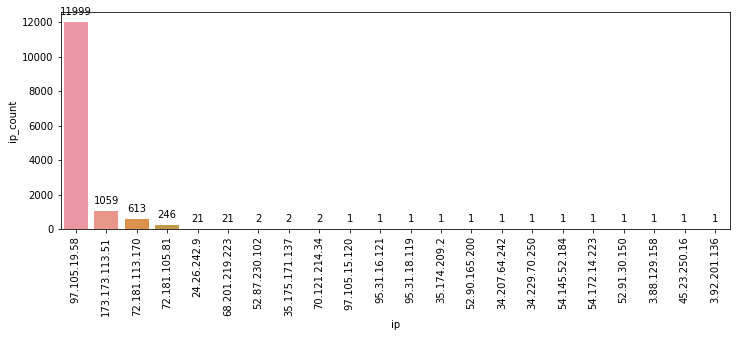

In [9]:
print(len(ip_df))

print(ip_df.tail(10))

plt.figure(figsize=(12, 4))
splot = sns.barplot(data=ip_df, x = 'ip', y = 'ip_count', ci = None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), 
                   textcoords = 'offset points'
                   )
    plt.xticks(rotation='vertical')

# Detecting anomalies by **establishing a baseline** and evaluating as new data arrives

## Establish Baseline:

In [10]:
train = df['2019-04-16 19:34:42':'2019-04-17 12:55:14'][['ip','request_method','status','size','destination','request_agent','size_mb']]

## Computer probabilities base on train sample:

In [11]:
ip_df = pd.DataFrame(train.ip.value_counts(dropna=False)/train.ip.count()).reset_index().\
                rename(index=str, columns={'index': 'ip', 'ip': 'ip_proba'})

## Merge probabilities with all data (train + new data):

### Where the ip address is **new (ie, not seen in the training set),** fill the probability with a value of 0 (zero)

In [12]:
df = df.reset_index().merge(ip_df, on=['ip'], how='left').fillna(value=0).set_index('timestamp')
df.ip_proba.value_counts()

0.858595    11999
0.075784     1059
0.043867      613
0.017604      246
0.001503       42
0.000072       10
0.000143        6
0.000000        3
Name: ip_proba, dtype: int64

# Conditional Probabilities: Probabilities using 2 discrete variables

## Probability of Status given IP Address:
###If we are looking for an unexpected status (like authentication failure) from a known/common IP address.

In [13]:
ip_probs = train.groupby('ip').size().div(len(df)) # gives us ip probabilities again

# vv looks for unique combos of 'ip' and 'status'
status_given_ip = pd.DataFrame(train.groupby(['ip', 'status']).\
                               size().div(len(train)).\
                               div(ip_probs, 
                                   axis=0, 
                                   level='ip').\
                               reset_index().\
                               rename(index=str, 
                                      columns={0: 'proba_status_given_ip'})
                              )

# A singlie ip w/ 5 separate statuses will appear 5 different times

In [14]:
ip_status_count = pd.DataFrame(train.groupby(['ip', 'status'])['request_method'].\
                                count().reset_index().\
                                rename(index=str, 
                                       columns={'request_method': 'ip_status_count'}))


ip_status = status_given_ip.merge(ip_status_count)

## Add these probabilities to original events to detect anomalous events:

In [15]:
df = df.reset_index().merge(ip_status, on=['ip', 'status'], how='left').fillna(value=0).set_index('timestamp')

In [16]:
df.head()

,ip,request_method,status,size,destination,request_agent,size_mb,ip_proba,proba_status_given_ip,ip_status_count
timestamp,,,,,,,,,,
2019-04-16 19:34:42+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,0,python-requests/2.21.0,0.488753,0.858595,0.999119,11984.0
2019-04-16 19:34:42+00:00,97.105.19.58,GET /api/v1/items HTTP/1.1,200,3561,0,python-requests/2.21.0,0.003396,0.858595,0.999119,11984.0
2019-04-16 19:34:44+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510103,0,python-requests/2.21.0,0.486472,0.858595,0.999119,11984.0
2019-04-16 19:34:46+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510003,0,python-requests/2.21.0,0.486377,0.858595,0.999119,11984.0
2019-04-16 19:34:48+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,511963,0,python-requests/2.21.0,0.488246,0.858595,0.999119,11984.0


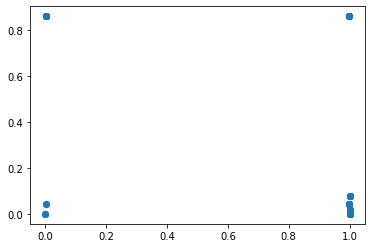

In [17]:
plt.scatter(df.proba_status_given_ip, df.ip_proba)

# x-axis is the 'proba_status_given_ip', y-axis is 'ip_proba'

# *From the Exercise*

In [56]:
colnames=['ip', 'timestamp', 'request_method', 'status', 'size',
          'destination', 'request_agent']
df_orig = pd.read_csv('http://python.zach.lol/access.log',          
                 engine='python',
                 header=None,
                 index_col=False,
                 names=colnames,
                 sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
                 na_values='"-"',
                 usecols=[0, 3, 4, 5, 6, 7, 8]

orig_df = df_orig = pd.read_fwf("curriculum-access.txt",
          
                 engine='python',
                 header=None,
                 index_col=False,
                 names=colnames,
                 sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
                 na_values='"-"',
                 usecols=[0, 3, 4, 5, 6, 7, 8]
                 parse_dates=[['ip', 'timestamp']]
)

new_df =  pd.DataFrame([["95.31.18.119", "[21/Apr/2019:10:02:41+0000]", 
                     "GET /api/v1/items/HTTP/1.1", 200, 1153005, np.nan, 
                     "python-requests/2.21.0"],
                    ["95.31.16.121", "[17/Apr/2019:19:36:41+0000]", 
                     "GET /api/v1/sales?page=79/HTTP/1.1", 301, 1005, np.nan, 
                     "python-requests/2.21.0"],
                    ["97.105.15.120", "[18/Apr/2019:19:42:41+0000]", 
                     "GET /api/v1/sales?page=79/HTTP/1.1", 301, 2560, np.nan, 
                     "python-requests/2.21.0"],
                    ["97.105.19.58", "[19/Apr/2019:19:42:41+0000]", 
                     "GET /api/v1/sales?page=79/HTTP/1.1", 200, 2056327, np.nan, 
                     "python-requests/2.21.0"]], columns=colnames)

df = df_orig.append(new)

In [57]:
df

,destination,ip,ip_timestamp,request_agent,request_method,size,status,timestamp
0,NaN,NaN,2018-01-26 09:55:03,NaN,/ 1 8.0 98.106.20.62,NaN,NaN,NaN
1,NaN,NaN,2018-01-26 09:56:02,NaN,java-ii 1 8.0 98.106.20.62,NaN,NaN,NaN
2,NaN,NaN,2018-01-26 09:56:05,NaN,java-ii/object-oriented-programming 1 8.0 98.1...,NaN,NaN,NaN
3,NaN,NaN,2018-01-26 09:56:06,NaN,slides/object_oriented_programming 1 8.0 98.10...,NaN,NaN,NaN
4,NaN,NaN,2018-01-26 09:56:24,NaN,javascript-i/conditionals 2 22.0 98.106.20.62,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
543595,NaN,NaN,2020-05-15 15:06:05,NaN,examples/javascript/blog.json 643 57.0 174.175...,NaN,NaN,NaN
0,NaN,95.31.18.119,NaT,python-requests/2.21.0,GET /api/v1/items/HTTP/1.1,1153005.0,200,[21/Apr/2019:10:02:41+0000]
1,NaN,95.31.16.121,NaT,python-requests/2.21.0,GET /api/v1/sales?page=79/HTTP/1.1,1005.0,301,[17/Apr/2019:19:36:41+0000]
2,NaN,97.105.15.120,NaT,python-requests/2.21.0,GET /api/v1/sales?page=79/HTTP/1.1,2560.0,301,[18/Apr/2019:19:42:41+0000]


**Column names don't look right.  Gotta rename them accordingly:**

### Actually tried this (^^), but upon further inspection, it just looks like the ip column has dates in it.  We'll have to keep the data as is for now.

ValueError: could not convert string to float: '[21/Apr/2019:10:02:41+0000]'

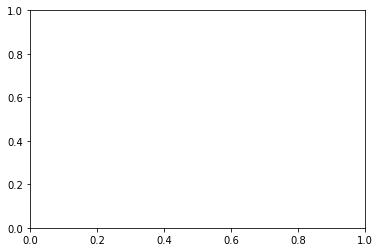

In [58]:
# using formula plt.scatter(df.preTestScore, df.postTestScore, s=df.age)

plt.scatter(df.timestamp, df.request_agent)

**Okay, so scatterplot's not working because it can not convert string to float.  Got some cleaning to do.**

In [59]:
df.timestamp = df.timestamp.str.replace(r'(\[|\])', '', regex=True)
# df.timestamp= pd.to_datetime(df.timestamp.str.replace(':', ' ', 1)) 
df = df.set_index('timestamp')

In [60]:
df

,destination,ip,ip_timestamp,request_agent,request_method,size,status
timestamp,,,,,,,
NaN,NaN,NaN,2018-01-26 09:55:03,NaN,/ 1 8.0 98.106.20.62,NaN,NaN
NaN,NaN,NaN,2018-01-26 09:56:02,NaN,java-ii 1 8.0 98.106.20.62,NaN,NaN
NaN,NaN,NaN,2018-01-26 09:56:05,NaN,java-ii/object-oriented-programming 1 8.0 98.1...,NaN,NaN
NaN,NaN,NaN,2018-01-26 09:56:06,NaN,slides/object_oriented_programming 1 8.0 98.10...,NaN,NaN
NaN,NaN,NaN,2018-01-26 09:56:24,NaN,javascript-i/conditionals 2 22.0 98.106.20.62,NaN,NaN
...,...,...,...,...,...,...,...
NaN,NaN,NaN,2020-05-15 15:06:05,NaN,examples/javascript/blog.json 643 57.0 174.175...,NaN,NaN
21/Apr/2019:10:02:41+0000,NaN,95.31.18.119,NaT,python-requests/2.21.0,GET /api/v1/items/HTTP/1.1,1153005.0,200
17/Apr/2019:19:36:41+0000,NaN,95.31.16.121,NaT,python-requests/2.21.0,GET /api/v1/sales?page=79/HTTP/1.1,1005.0,301


In [63]:
df.isnull().sum()

destination       543600
ip                543596
ip_timestamp           4
request_agent     543596
request_method         0
size              543596
status            535323
dtype: int64

In [64]:
drops = df.drop(["destination", "ip", "request_agent", "size", "status"], axis = 1)

In [66]:
drops


,ip_timestamp,request_method
timestamp,,
NaN,2018-01-26 09:55:03,/ 1 8.0 98.106.20.62
NaN,2018-01-26 09:56:02,java-ii 1 8.0 98.106.20.62
NaN,2018-01-26 09:56:05,java-ii/object-oriented-programming 1 8.0 98.1...
NaN,2018-01-26 09:56:06,slides/object_oriented_programming 1 8.0 98.10...
NaN,2018-01-26 09:56:24,javascript-i/conditionals 2 22.0 98.106.20.62
...,...,...
NaN,2020-05-15 15:06:05,examples/javascript/blog.json 643 57.0 174.175...
21/Apr/2019:10:02:41+0000,NaT,GET /api/v1/items/HTTP/1.1
17/Apr/2019:19:36:41+0000,NaT,GET /api/v1/sales?page=79/HTTP/1.1


In [49]:
for col in ['request_method', 'request_agent']:
    df[col] = df[col].str.replace('"', '')

df['request_method'] = df.request_agent.str.replace(r'\?page=[0-9]+', '', regex=True)

df

,ip,request_method,status,size,destination,request_agent
timestamp,,,,,,
09:55:03,2018-01-26,NaN,NaN,NaN,NaN,NaN
09:56:02,2018-01-26,NaN,NaN,NaN,NaN,NaN
09:56:05,2018-01-26,NaN,NaN,NaN,NaN,NaN
09:56:06,2018-01-26,NaN,NaN,NaN,NaN,NaN
09:56:24,2018-01-26,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
15:06:05,2020-05-15,NaN,NaN,NaN,NaN,NaN
21/Apr/2019:10:02:41+0000,95.31.18.119,python-requests/2.21.0,NaN,1153005.0,NaN,python-requests/2.21.0
17/Apr/2019:19:36:41+0000,95.31.16.121,python-requests/2.21.0,NaN,1005.0,NaN,python-requests/2.21.0


ValueError: could not convert string to float: 'python-requests/2.21.0'

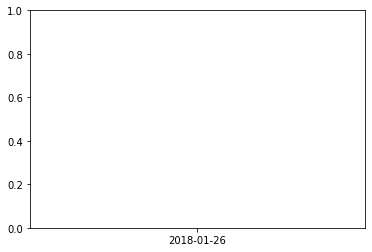

In [52]:
plt.scatter(df["ip"], df["request_agent"])

**To correct this (^^) error, we need to convert strings to floats**

In [54]:
df['ip'] = df['ip'].astype(float)

df['request_agent'] = df["request_agent"].astype(float)

ValueError: could not convert string to float: '2018-01-26'

In [42]:
def get_topic(destination):
    ds_list = ["python", "time series", "nlp"]
    web_dev = ["javascript", "java", "css"]
    for ds in ds_list:
        if ds in destination:
            return "Data Science"
    for wd in web_dev:
        if wd in destination:
            return "Web Dev"
    return "Unknown"
df["course"] = df.destination.apply(get_topic)

TypeError: argument of type 'float' is not iterable

In [ ]:
**To correct this error, we need to convert strings to floats**